In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

#### Merging 12 months of data into single file

In [224]:
files = [file for file in os.listdir ('./Sales_Data') if file.endswith('.csv')]

all_months_data=pd.DataFrame()

for file in files:
    df= pd.read_csv("./Sales_Data/"+file)
    all_months_data= pd.concat ([all_months_data, df])
    all_months_data.to_csv("all_data.csv",index= False)


In [225]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Remove nan values

In [230]:
rows_with_nan= all_data[all_data.isna().any(axis=1)]
rows_with_nan 

all_data=all_data.dropna(how='all')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Remove 'Or' from 'Order Date'

In [232]:
all_data= all_data[all_data['Order Date'].str[0:2]!='Or']

#### QUESTION 1: What was the best month for sales? How much was earned in that month?

#### Add month column

In [234]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### change quantity and price to appropriate column type and calculate sales

In [256]:
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

In [258]:
all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']

In [260]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [273]:
result= all_data.groupby('Month').sum(numeric_only=True)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


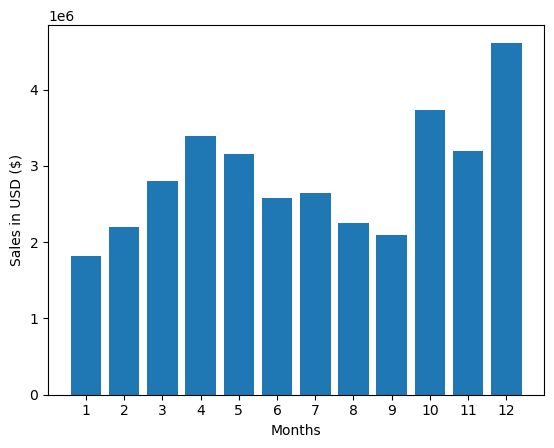

In [279]:
months= range(1,13)
plt.bar(months,result['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.show()

#### QUESTION 2: Which city has the highest sales?

#### add city column

In [372]:
def city(address):
    return address.split(',')[1]

def state(address):
    return address.split(',')[2].strip().split(' ')[0]

all_data['City']=all_data['Purchase Address'].apply(lambda x: f'{city(x)} ({state(x)})')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


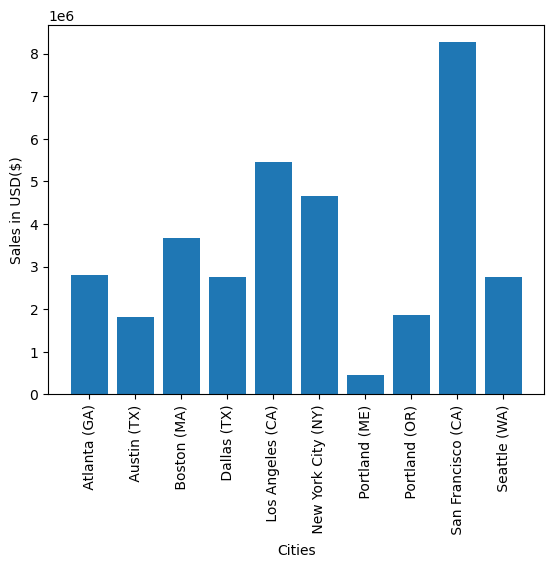

In [390]:
x=all_data.groupby('City').sum(numeric_only=True)['Sales']
plt.bar(x.index,x.values)
plt.xticks(x.index, rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Sales in USD($)')
plt.show()


#### QUESTION 3 : What time should we display advertisemens to maximize the likelihood of customer’s buying product?

#### Change date column to date dtype and add hour column

In [407]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'], format='%m/%d/%Y')
all_data['Hour']= all_data['Order Date'].dt.hour


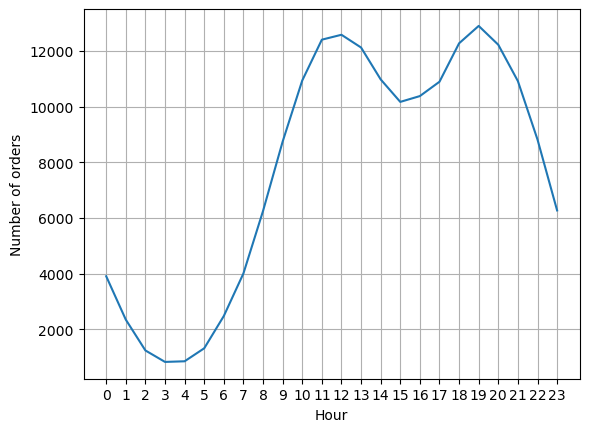

In [437]:
hour= all_data.groupby('Hour').count().index
count_of_hour=[value[0] for value in all_data.groupby('Hour').count().values]
plt.plot(hour,count_of_hour)
plt.xticks(hour)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.show()

#### QUESTION 4: What products are most often sold together?

In [521]:
df= all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped Products']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID','Grouped Products']].drop_duplicates()
df.head()


C:\Users\aasud\AppData\Local\Temp\ipykernel_23704\1642444337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped Products']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [514]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df['Grouped Products']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print()


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

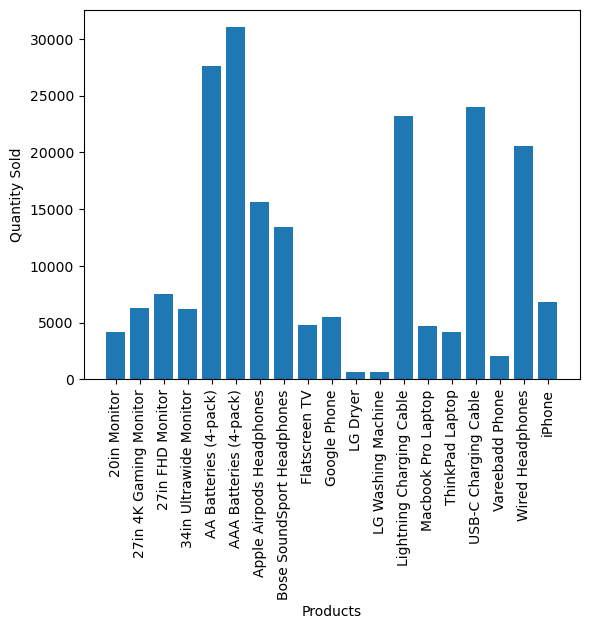

In [558]:
result=all_data.groupby('Product').sum(numeric_only=True)['Quantity Ordered']

plt.bar(result.index,result.values)
plt.xticks(result.index, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity Sold')
plt.show()


#### price vs quantity sold evaluation for products

C:\Users\aasud\AppData\Local\Temp\ipykernel_23704\3046741522.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(prices.index,rotation='vertical',size=8)


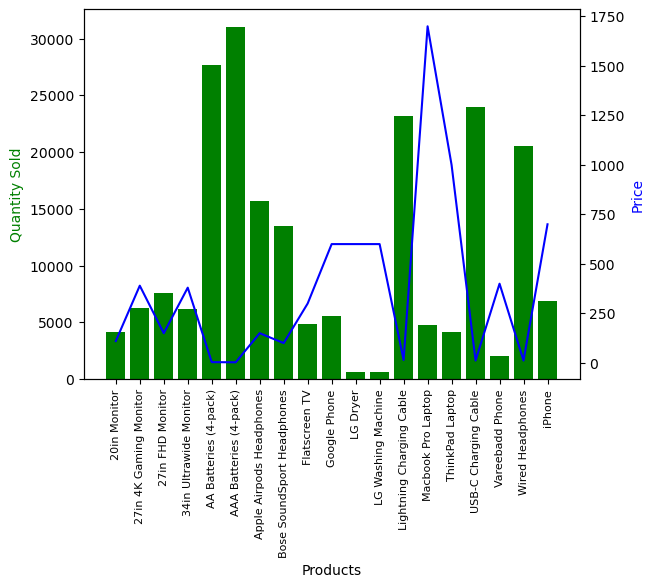

In [581]:
prices= all_data.groupby('Product').mean(numeric_only=True)['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(result.index,result.values,color='g')
ax2.plot(prices.index, prices.values, 'b-')

ax1.set_xticklabels(prices.index,rotation='vertical',size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Sold', color='g')
ax2.set_ylabel('Price', color='b')

plt.show()